In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as oj

In [2]:
# get all of the dataids in results
dataids = []
for filename in os.listdir('results/'):
    # get last six characters of filename
    dataids.append(filename[6:])
dataids

['361617',
 '361250',
 '361249',
 '361234',
 '361243',
 '361257',
 '361622',
 '361261',
 '361259',
 '361253',
 '361237',
 '361247',
 '361619',
 '361254',
 '361621',
 '361266',
 '361256',
 '361623',
 '361264',
 '361242',
 '361235',
 '361269',
 '361251',
 '361255',
 '361618',
 '361236',
 '361241',
 '361260',
 '361252',
 '361258']

In [3]:
# set the path we want to look at
seeds = np.arange(1, 11, 1)
metric = "rmse"
pipeline = 2
clustertype = "hierarchical"
paths = []
for dataid in dataids:
    for seed in seeds:
        paths.append(oj("results", f"dataid{dataid}", f"seed{seed}", f"{metric}", str(clustertype)))

In [18]:
data_results = []
for dataid in dataids:
    data_result = []
    for seed in seeds:
        path = oj("results", f"dataid{dataid}", f"seed{seed}", f"{metric}", str(clustertype))
        # if path exists
        if not os.path.exists(path):
            continue
        files = os.listdir(path)
        method_results = []
        for file in files:
            if file.endswith(".csv"):
                method_result = pd.read_csv(oj(path, file))
                method_result = method_result.rename(columns={"rmse":file[:-4]})
                method_results.append(method_result)
            seed_result = pd.concat(method_results, axis=1)
            seed_result = seed_result.loc[:,
                                ~seed_result.columns.str.contains('^Unnamed')]
            seed_result = seed_result.loc[:, ~seed_result.columns.duplicated()]
        if dataid == "361617":
            print(seed)
            print(seed_result["lasso_l2_signed_normed_noleafavg_norank"])
        data_result.append(seed_result)
    # average all of the dataframes in data_result
    data_result = sum(data_result) / len(data_result)
    data_results.append(data_result)

1
0    0.210224
1    0.220228
2    0.186688
3    0.161838
4    0.166085
5    0.173663
6    0.160990
7    0.151103
8    0.148487
Name: lasso_l2_signed_normed_noleafavg_norank, dtype: float64
2
0    0.226198
1    0.227379
2    0.160510
3    0.163259
4    0.171894
5    0.162313
6    0.187754
7    0.182449
8    0.154820
Name: lasso_l2_signed_normed_noleafavg_norank, dtype: float64
3
0    2.120058e-01
1    2.052050e-01
2    1.440494e-01
3    1.578458e-01
4    1.601082e-01
5    1.602225e-01
6    3.941527e+11
7    7.520470e+11
8    2.908754e-01
Name: lasso_l2_signed_normed_noleafavg_norank, dtype: float64
4
0    0.212301
1    0.232746
2    0.198438
3    0.161851
4    0.153588
5    0.145414
6    0.147955
7    0.154010
8    0.167754
Name: lasso_l2_signed_normed_noleafavg_norank, dtype: float64
5
0    2.233610e-01
1    2.163500e-01
2    1.692817e-01
3    1.907662e-01
4    1.593582e-01
5    3.354207e+11
6    1.283680e+11
7    1.523750e-01
8    1.517850e-01
Name: lasso_l2_signed_normed_noleafavg_n

KeyboardInterrupt: 

In [5]:
len(data_results)

30

In [6]:
# in each data_result, keep only nclust, lmdi_lasso, lmdi_ridge, shap, lime, rawdata
for i in range(len(data_results)):
    data_results[i] = data_results[i][["nclust", "lasso_l2_signed_normed_noleafavg_norank", "shap", "lime", "rawdata"]]

In [7]:
# for each data_result, only keep the first four rows
# for i in range(len(data_results)):
#     data_results[i] = data_results[i].iloc[0:4]

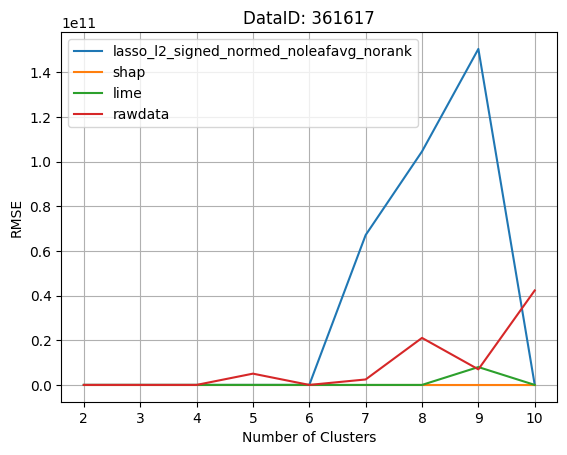

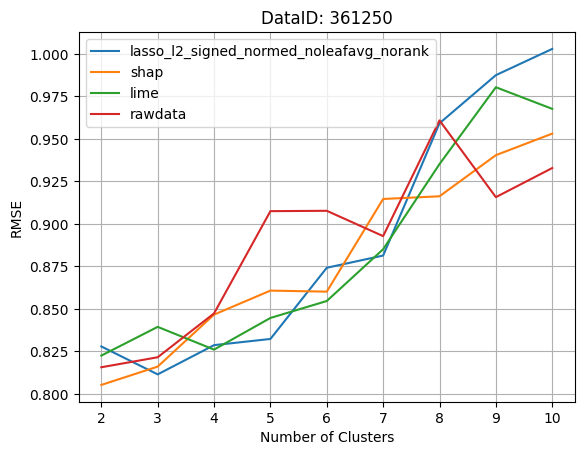

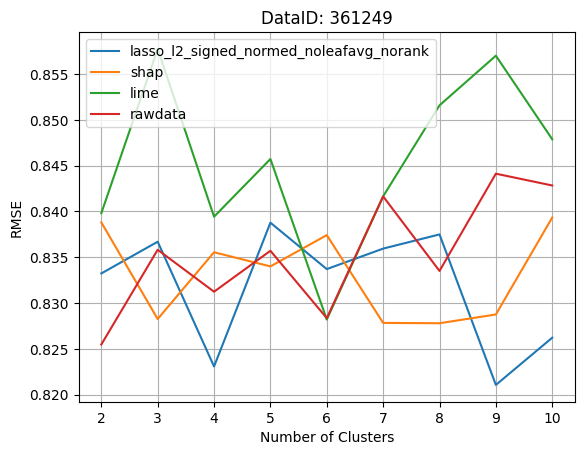

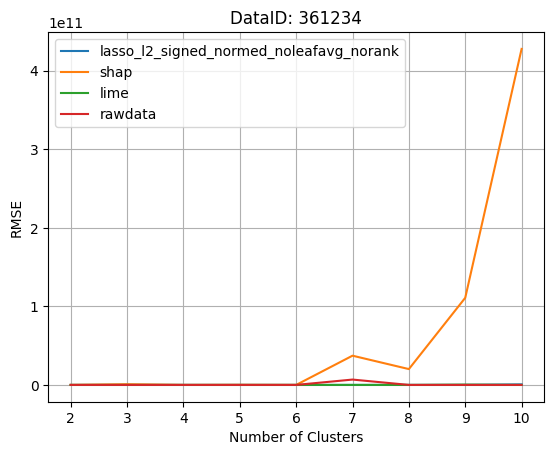

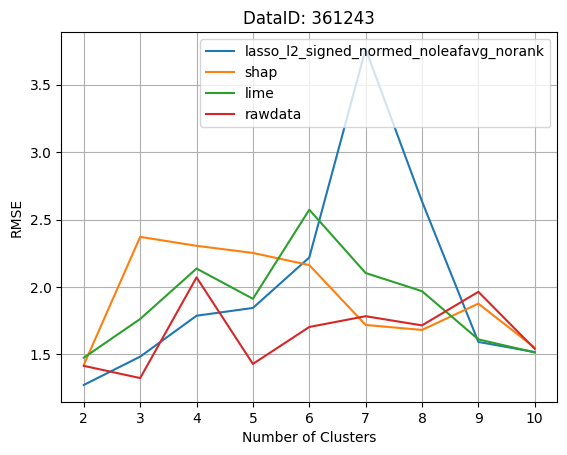

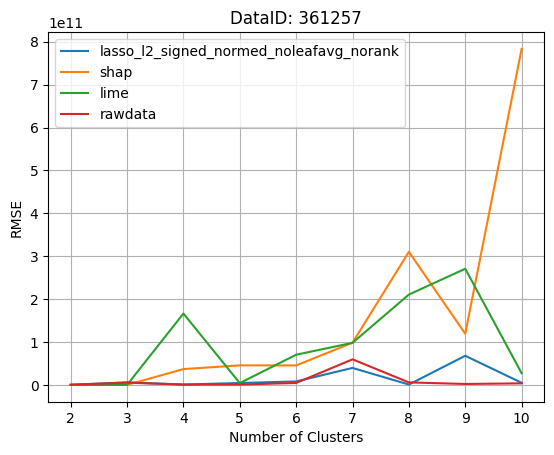

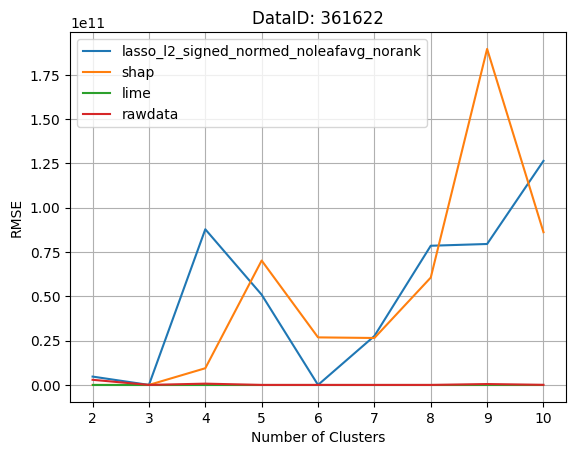

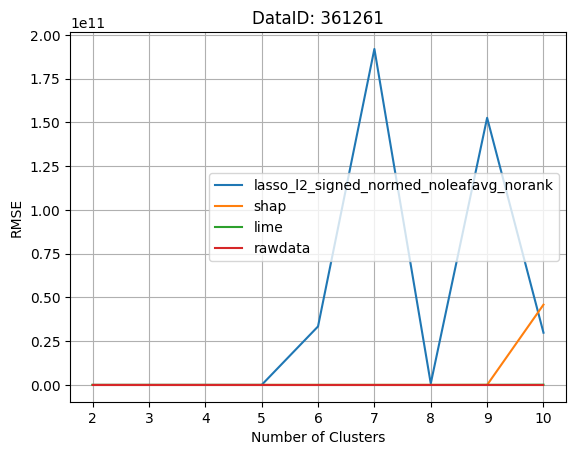

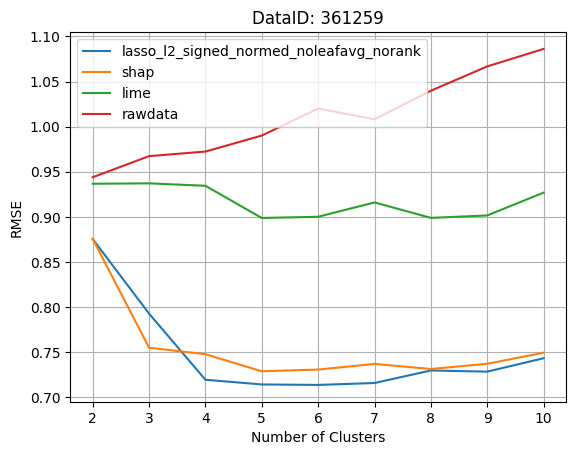

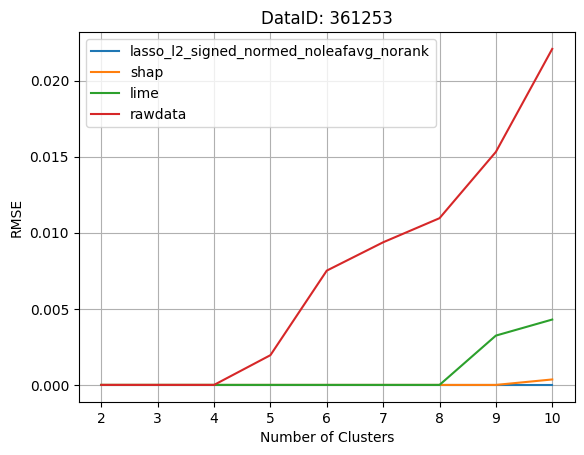

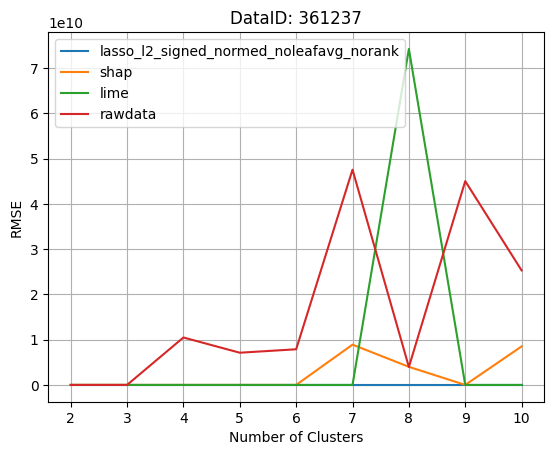

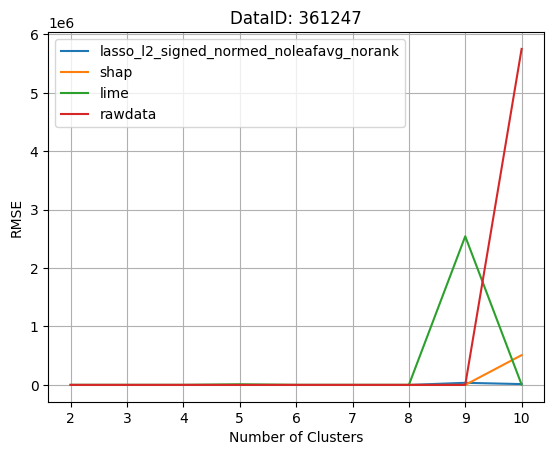

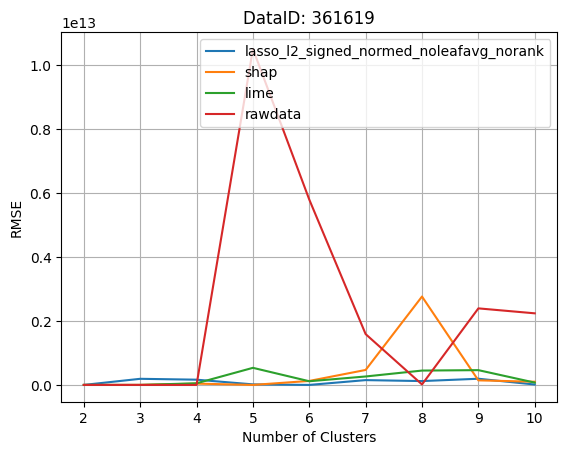

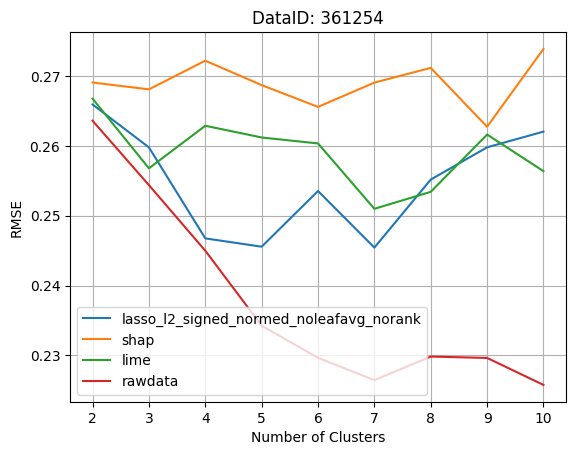

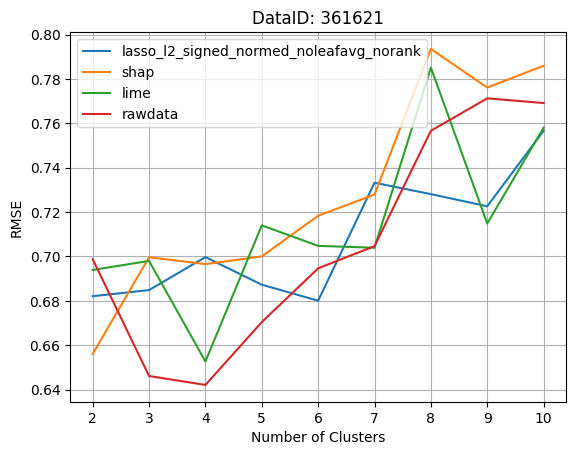

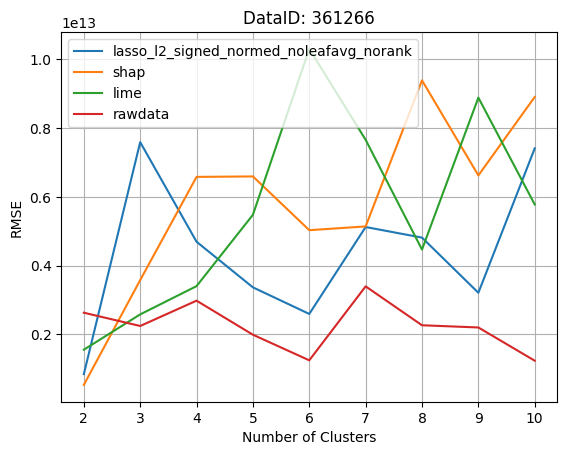

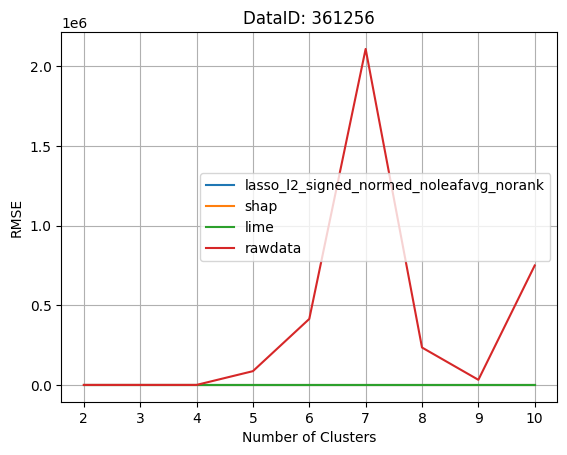

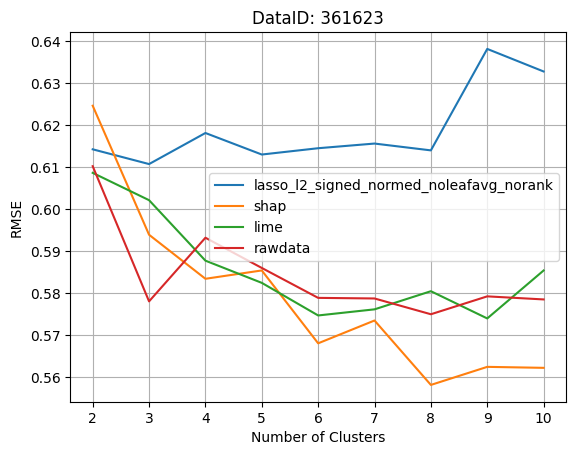

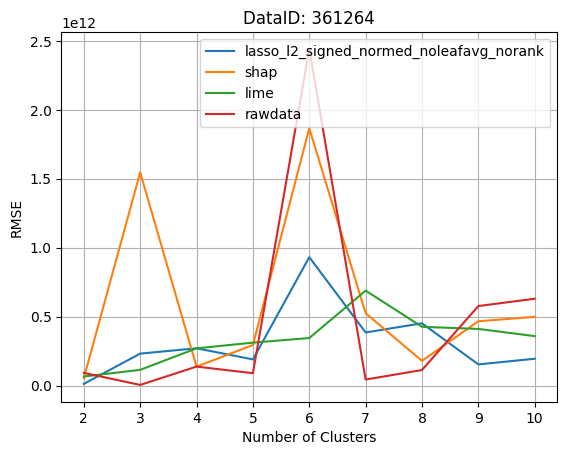

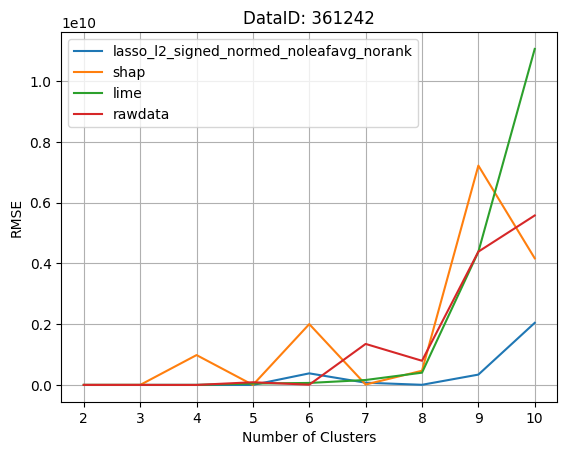

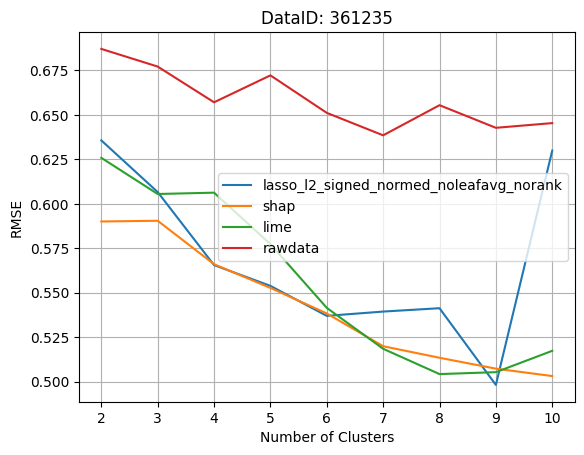

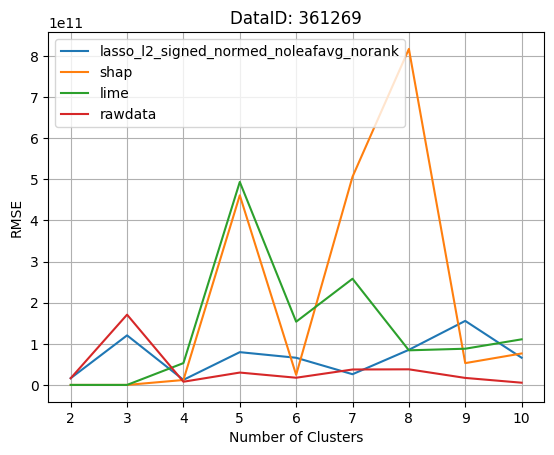

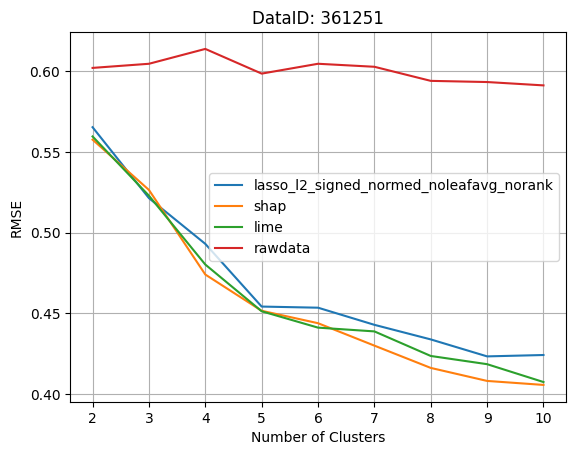

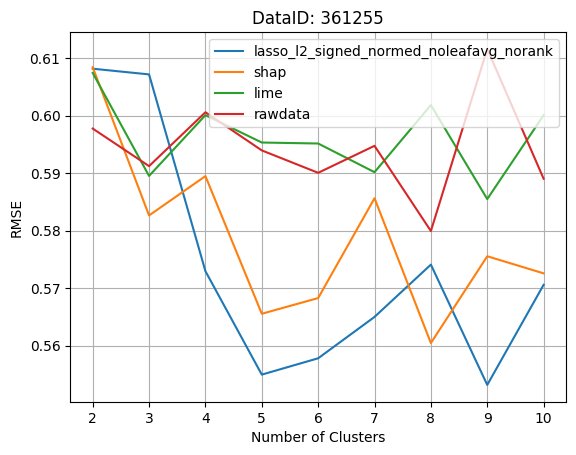

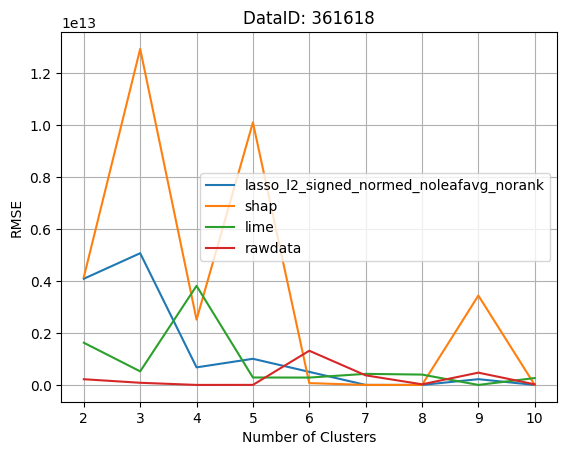

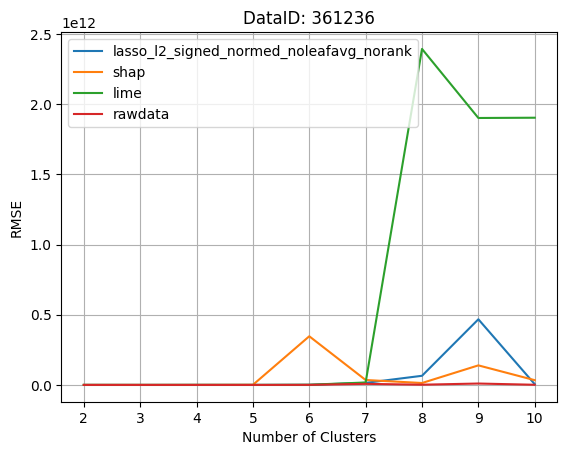

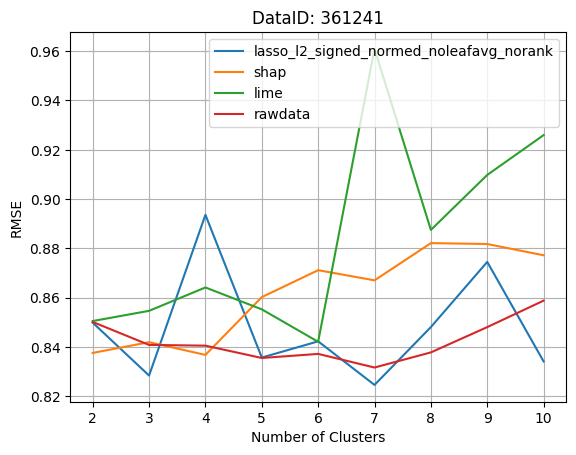

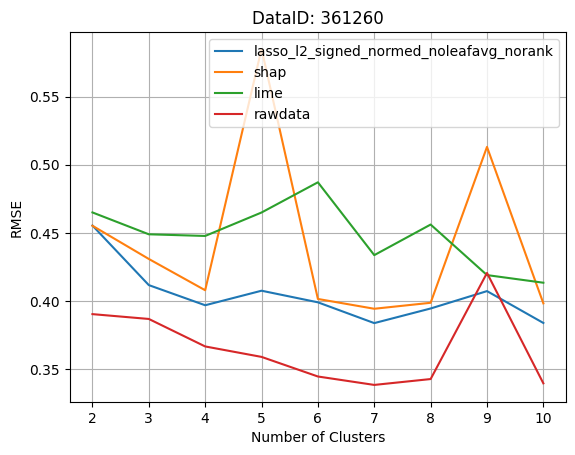

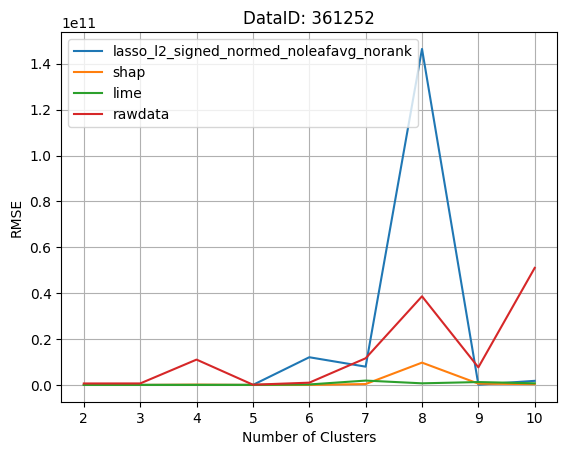

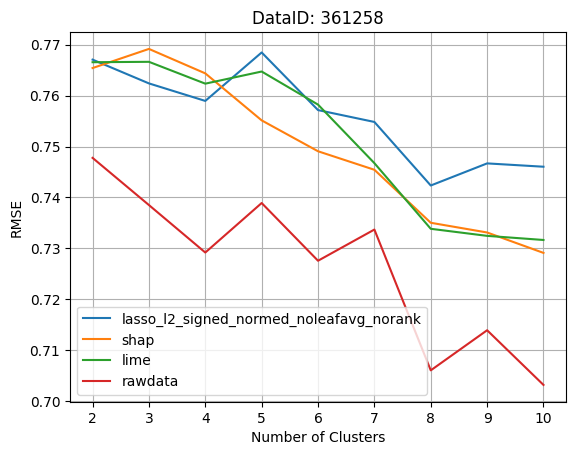

In [8]:
# plot the data, with nclust on x-axis and the rest being lines
i = 0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result.plot(grid=True)
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    # move legend to side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # remove legend
    #plt.legend().remove()
    # show legend
    plt.legend()
    plt.show()
    i+=1


In [9]:
data_results[0]

,nclust,lasso_l2_signed_normed_noleafavg_norank,shap,lime,rawdata
0,2.0,2.168181e-01,0.228476,2.269150e-01,2.182501e-01
1,3.0,2.203815e-01,0.176127,2.229092e-01,1.807376e-01
2,4.0,1.717935e-01,0.168314,1.868456e-01,1.715644e-01
3,5.0,1.671121e-01,0.158149,1.751256e-01,5.048289e+09
4,6.0,1.622066e-01,0.135269,1.378946e-01,1.598046e-01
5,7.0,6.708413e+10,0.126575,1.149422e-01,2.445028e+09
6,8.0,1.045041e+11,0.109885,9.833184e-02,2.104611e+10
7,9.0,1.504094e+11,0.108192,7.995167e+09,6.966726e+09
8,10.0,1.827444e-01,0.090897,6.795563e-02,4.229521e+10


In [10]:
# plot the data, only shap and aloo_l2_unsigned_nonnormed_leafavg_rank
# i=0
# for data_result in data_results:
#     data_result = data_result.set_index("nclust")
#     data_result[["shap", "nonloo_l2_signed_nonnormed_leafavg_rank"]].plot(grid=True)
#     # move legend to side
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     # call aloo_l2_unsigned_nonnormed_leafavg_rank lmdi+
#     plt.legend(["SHAP", "LMDI+"])
#     # y axis label is RMSE
#     plt.ylabel("RMSE")
#     # x axis label is number of clusters
#     plt.xlabel("Number of Clusters")
#     # title is the dataid
#     plt.title("DataID: " + dataids[i])
#     plt.show()
#     i+=1

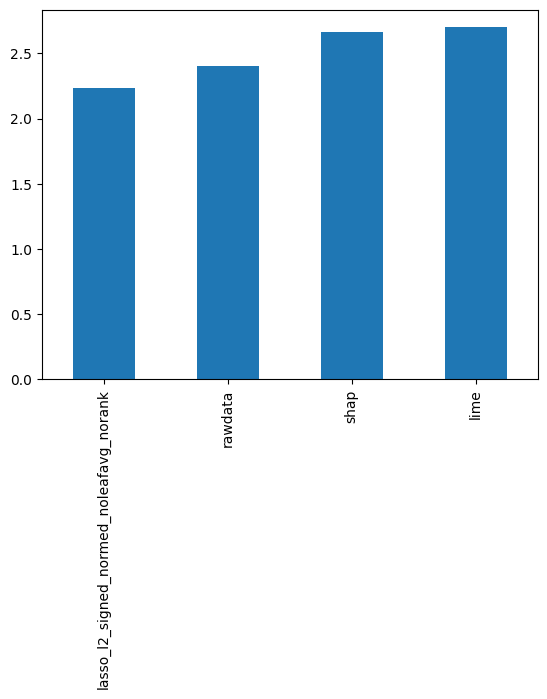

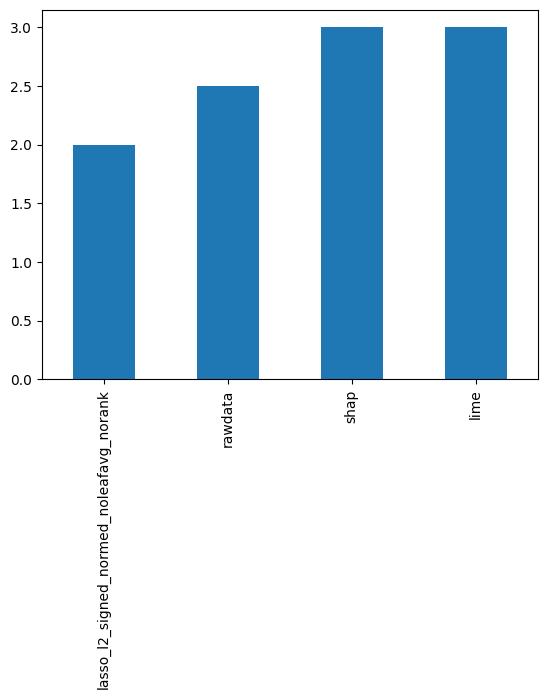

In [11]:
auroc_ranks = []
for data_result in data_results:
    auroc = data_result.drop("nclust", axis=1).apply(np.trapz, x=data_result["nclust"])
    # convert to ranking, i.e. 1 is lowest, 2 is second lowest, etc.
    auroc_rank = auroc.rank()
    auroc_ranks.append(auroc_rank)
# merge series in auroc_ranks by averaging the ranks corresponding to the same names
auroc_ranks = pd.concat(auroc_ranks, axis=1)
auroc_ranks_mean = auroc_ranks.mean(axis=1)
auroc_ranks_median = auroc_ranks.median(axis=1)
auroc_ranks_mean = auroc_ranks_mean.sort_values()
auroc_ranks_median = auroc_ranks_median.sort_values()
auroc_ranks_mean.plot(kind="bar")
plt.show()
auroc_ranks_median.plot(kind="bar")
plt.show()

In [12]:
auroc_ranks

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
lasso_l2_signed_normed_noleafavg_norank,4.0,3.0,1.0,1.0,4.0,2.0,3.0,4.0,1.0,1.0,...,3.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,4.0,4.0
shap,1.0,1.0,2.0,4.0,3.0,4.0,4.0,3.0,2.0,2.0,...,1.0,4.0,1.0,2.0,4.0,3.0,3.0,3.0,2.0,2.0
lime,2.0,2.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,3.0,...,2.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,1.0,3.0
rawdata,3.0,4.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,...,4.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0


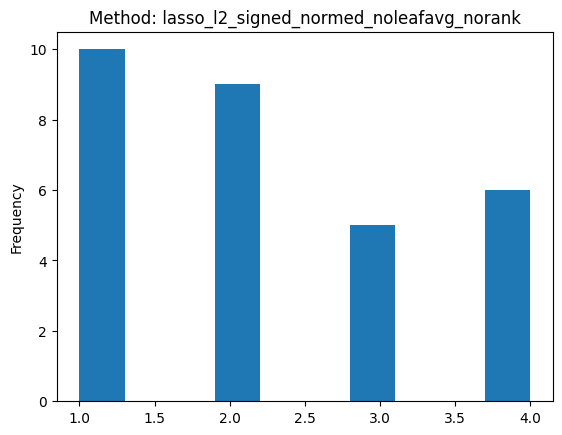

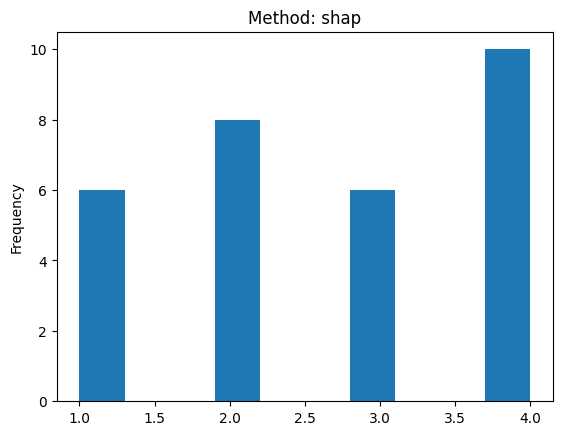

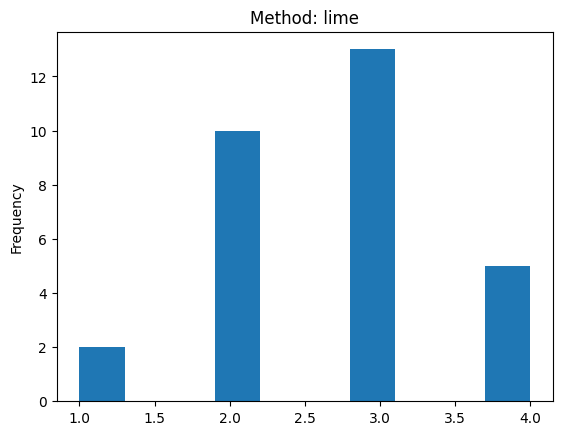

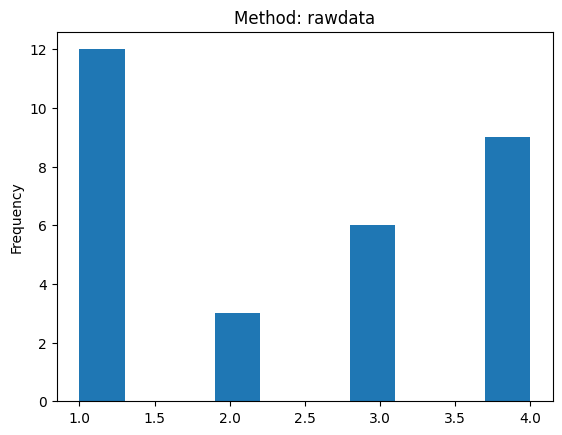

In [13]:
# for each row in auroc_ranks, plot a histogram of the ranks
for i in range(auroc_ranks.shape[0]):
    auroc_ranks.iloc[i].plot(kind="hist")
    plt.title("Method: " + auroc_ranks.index[i])
    plt.show()

    